<a href="https://colab.research.google.com/github/jimjoseph51000/fpl-simulator/blob/main/Player_Swapout_jj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import requests, json
from pprint import pprint

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [3]:
% cd /gdrive/MyDrive/CSE_519_DSF/gitcode/fpl-simulator-main/

/gdrive/MyDrive/CSE_519_DSF/gitcode/fpl-simulator-main


In [4]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt

from simulator import *
from model import *
from scout import *
# from util import *

### Sanity Checks

Sanity Check #1 : Random Simulated Transfers . This generates 10 transfers for 10 game weeks at one time and the final team at end of season is computed.\


$T_w = f(T_0, transfers)$ \\
$transfers = t_0 || t_1 || t_2 || . . . ||t_w where \; t_i  $ are individual transfer in&out at each game week \
$T_O$ is team at game week 0 \
$T_w$ is team at game week w (end) \
$f$ is the do transfer function
$transfers$ are the in out transfer of shape $(N_t,15,10)$
$N_t$ is the number of transfers which is this case is 10


(620,) (620, 10) (620, 10) (2, 620, 10)
cumsum of per_week_total_points:  [ 80. 166. 238. 297. 355. 401. 436. 484. 540. 588.]
(15, 10) (15, 10) (15, 10) (2, 15, 10)


100%|██████████| 10000/10000 [00:13<00:00, 718.23it/s]


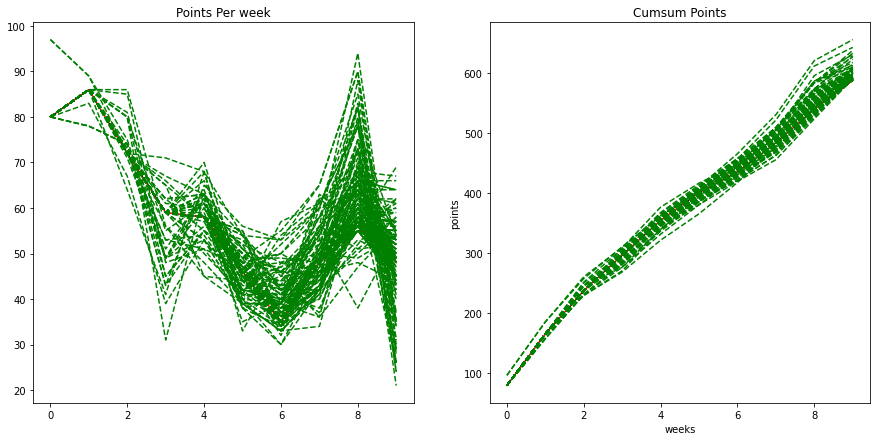

actually_better_plots : 170
[596.0, 596.0, 596.0, 606.0, 602.0, 591.0, 603.0, 599.0, 593.0, 591.0, 600.0, 589.0, 591.0, 589.0, 591.0, 589.0, 593.0, 595.0, 602.0, 589.0, 590.0, 596.0, 589.0, 596.0, 594.0, 592.0, 597.0, 606.0, 591.0, 611.0, 613.0, 591.0, 638.0, 590.0, 589.0, 633.0, 590.0, 596.0, 592.0, 601.0, 596.0, 592.0, 592.0, 593.0, 593.0, 589.0, 643.0, 592.0, 593.0, 590.0, 595.0, 595.0, 593.0, 597.0, 592.0, 607.0, 594.0, 593.0, 589.0, 609.0, 589.0, 596.0, 593.0, 594.0, 589.0, 590.0, 589.0, 592.0, 589.0, 601.0, 589.0, 593.0, 589.0, 618.0, 592.0, 589.0, 591.0, 607.0, 604.0, 590.0, 589.0, 594.0, 591.0, 589.0, 656.0, 631.0, 601.0, 591.0, 596.0, 595.0, 627.0, 593.0, 590.0, 605.0, 615.0, 589.0, 598.0, 608.0, 592.0, 591.0, 594.0, 590.0, 591.0, 600.0, 589.0, 594.0, 592.0, 595.0, 589.0, 600.0, 589.0, 599.0, 590.0, 594.0, 595.0, 591.0, 605.0, 590.0, 590.0, 595.0, 592.0, 590.0, 600.0, 589.0, 600.0, 601.0, 602.0, 598.0, 591.0, 591.0, 595.0, 590.0, 598.0, 593.0, 592.0, 589.0, 594.0, 593.0, 589.0

In [9]:
# main code
fpl_manager_id = '2757'
current_week = 10
env = FPLSimulator(current_week, fpl_manager_id, req_cols=['stats.ict_index','element_type'])

plot_pts = env.sample_visualization(10000)
print(plot_pts)

Sanity Check #2 : Random Simulated Transfers . This generates 1 transfer after the other for a total of 10 transfers. But there is a running players ids, cost ,points which gets updates after each and every transfer. \


$T_w = f(f(f(T_0, t_0),t_1),t_2)\; till\;t_w$ \\
$(t_0 , t_1 , t_2 ,  .. . .t_w)  where \; t_i  $ are individual transfer in&out at each game week \
$T_O$ is team at game week 0 \
$T_w$ is team at game week w (end) \
$f$ is the do transfer function
$t_i$ are the in out transfer of shape $(1,15,10)$



(620,) (620, 10) (620, 10) (2, 620, 10)
cumsum of per_week_total_points:  [ 80. 166. 238. 297. 355. 401. 436. 484. 540. 588.]
(15, 10) (15, 10) (15, 10) (2, 15, 10)


100%|██████████| 10000/10000 [02:15<00:00, 73.68it/s]


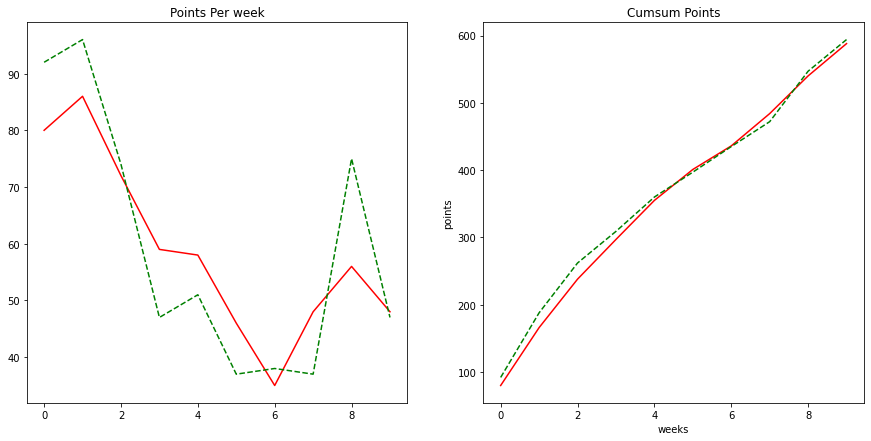

actually_better_plots : 1


100%|██████████| 10000/10000 [00:12<00:00, 816.71it/s]


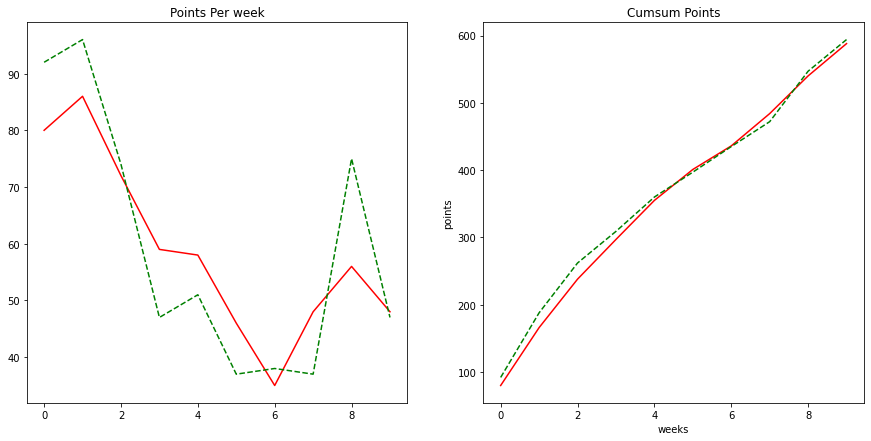

actually_better_plots : 1


True

In [10]:
fpl_manager_id = '2757'
current_week = 10
# env = FPLSimulator(current_week, fpl_manager_id)
env = FPLSimulator(current_week, fpl_manager_id, req_cols=['stats.ict_index','element_type'])

# temp = np.array(env.actual_players_ids)
projs, pts1 = env.sample_visualization2_transfer_after_transfer(10000)
# temp1 = np.array(env.actual_players_ids)
plot_pts = env.sample_visualization(10000, projs)
# temp2 = np.array(env.actual_players_ids)
# assert(np.all(temp == temp1))

np.all(pts1 == plot_pts) # very important . dont remove this. 

Sanity Check #3 : This is actual transfer ins and outs based on player profile candidate selections (for ins) and weakness ranking of current team (for outs). Cost, budget and minumum balances are considered here. \\

NOTE: The logs printed must be manually checked for appropriate transfer behaviour. Try varying the number of simulations etc . . .

In [11]:
# this is a good experiment where random action is taken and scout produces a transfer
# this is a sanity check for the transfer in and out. 
num_profiles = 5
# 1000 simulations
for sim_idx in range(10000):

  min_balance = 20
  # current_balance = 10
  K = 15
  fpl_manager_id = '2757'
  current_week = 10
  env = FPLSimulator(current_week, fpl_manager_id, req_cols=['stats.ict_index','element_type'])

  for week_idx in range(current_week):
    # week_idx = 0
    i = np.random.choice(num_profiles,1)[0]

    # scout = Scout(env, week_idx, min_balance)
    scout = Scout(env, week_idx, min_balance, env.balance, K)
    out_ids = scout.find_transfer_out_candidates()
    # in_ids = np.array([1,3,4,5,6,101,200,330,500,600])
    in_ids = scout.find_transfer_in_candidates(i, out_ids)
    sample_transfer_ins, env.balance = scout.get_transfer_in_out_players(in_ids, out_ids)
    # print(sample_transfer_ins[0,:,week_idx].shape)
    # print(sample_transfer_ins)
    # break
    select_mask = sample_transfer_ins[0,:,week_idx] > 0
    in_guy = sample_transfer_ins[0,:,week_idx][select_mask]
    out_guy = env.running_player_ids[:,week_idx][select_mask]
    assert(in_guy.shape == out_guy.shape == (1,))
    env.running_player_ids, env.running_player_points, env.running_player_cost = env.do_transfer(sample_transfer_ins, env.running_player_ids)

    print('sim_idx : {}, week:{},action:{},balance:{},in_guy:{},out_guy:{}'.format(sim_idx, week_idx,i, env.balance,in_guy,out_guy))#, in_ids, out_ids)
    # print('actual : {}'.format(env.actual_players_ids))
    # print('running: {}'.format(env.running_player_ids))
  print('------------')

Streaming output truncated to the last 5000 lines.
sim_idx : 9642, week:9,action:0,balance:93.0,in_guy:[148.],out_guy:[484]
------------
(620,) (620, 10) (620, 10) (2, 620, 10)
cumsum of per_week_total_points:  [ 80. 166. 238. 297. 355. 401. 436. 484. 540. 588.]
(15, 10) (15, 10) (15, 10) (2, 15, 10)
sim_idx : 9643, week:0,action:0,balance:90.0,in_guy:[1.],out_guy:[376]
sim_idx : 9643, week:1,action:3,balance:75.0,in_guy:[70.],out_guy:[233]
sim_idx : 9643, week:2,action:2,balance:40.0,in_guy:[268.],out_guy:[70]
sim_idx : 9643, week:3,action:3,balance:66.0,in_guy:[70.],out_guy:[145]
sim_idx : 9643, week:4,action:3,balance:84.0,in_guy:[529.],out_guy:[413]
sim_idx : 9643, week:5,action:2,balance:60.0,in_guy:[277.],out_guy:[268]
sim_idx : 9643, week:6,action:4,balance:81.0,in_guy:[314.],out_guy:[1]
sim_idx : 9643, week:7,action:0,balance:85.0,in_guy:[205.],out_guy:[177]
sim_idx : 9643, week:8,action:0,balance:83.0,in_guy:[411.],out_guy:[275]
sim_idx : 9643, week:9,action:4,balance:113.0,in